[View in Colaboratory](https://colab.research.google.com/github/schwaaweb/aimlds1_10-DeepLearning/blob/master/F10_SC_DJ_Deep_Learning_Sprint_Challenge.ipynb)

# Computer Vision



Select an RGB image of your choosing from somewhere on the internet. 

Import the image and display it.

In [2]:
%%time
!pip install imageio

    100% |████████████████████████████████| 3.3MB 4.6MB/s 
CPU times: user 56 ms, sys: 22 ms, total: 78 ms
Wall time: 2.8 s


In [0]:
import numpy as np
import imageio
import matplotlib.pyplot as plt


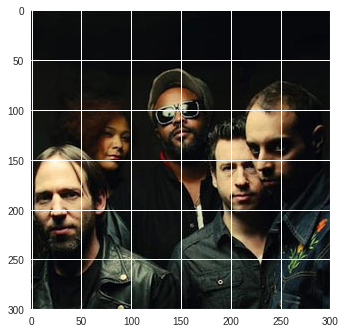

In [4]:
I = imageio.imread('http://www.syffal.com/sites/default/files/styles/album_review_image/public/kareem-bunton-the-juggs.jpg?itok=ZuO0A3f1')
plt.imshow(I)
plt.show()


Generate a grayscale version of the image and display it again.

(300, 300)


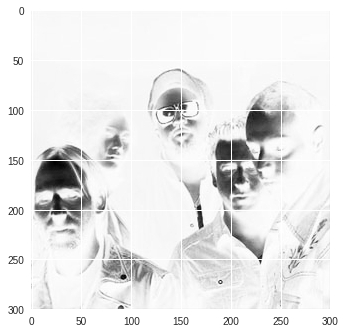

In [6]:
import numpy as np
import scipy.ndimage as nd
from skimage import color

I_g = color.rgb2gray(I)
print(I_g.shape)

plt.imshow(I_g)
plt.show()

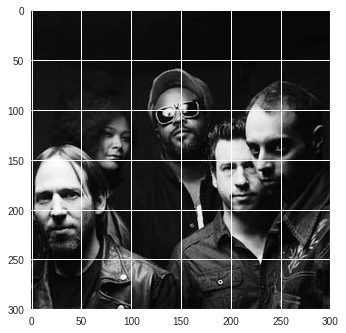

In [7]:
from skimage.exposure import rescale_intensity
I_g_r = rescale_intensity(1-color.rgb2gray(I))
plt.imshow(I_g_r)

Use Canny Edge Detection to find the edges in the image. Display the Canny Edge Detection image. 

In [0]:
import cv2
def auto_canny(image, sigma=0.33):
	# compute the median of the single channel pixel intensities
	v = np.median(image)
 
	# apply automatic Canny edge detection using the computed median
	lower = int(max(100, (1.0 - sigma) * v))
	upper = int(min(400, (1.0 + sigma) * v))
	edged = cv2.Canny(image, lower, upper)
 
	# return the edged image
	return edged

In [13]:
thomson_url = 'https://raw.githubusercontent.com/ryanleeallred/DeepLambda/master/Thomson2D.jpeg'
img = imageio.imread(thomson_url)
print(img.shape)

(192, 192, 3)


In [0]:
# Cell below errored without this save and read
from scipy import misc
misc.imsave('temp.jpg', I_g_r)
I_g_r0 = nd.imread('temp.jpg',0)

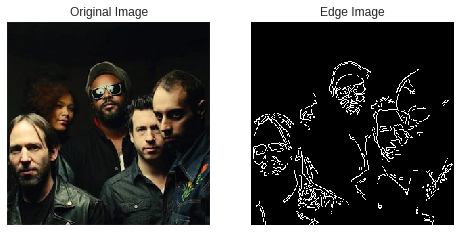

In [16]:
#edges = auto_canny(img, sigma=0.5)
edges = auto_canny(I_g_r0, sigma=0.5)

plt.subplot(121), plt.imshow(I, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges, cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

Compute the convolution of the image with the following Difference of Gaussian (DoG) filter: 

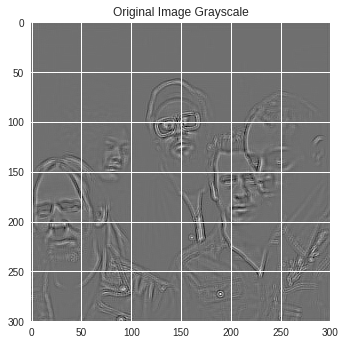

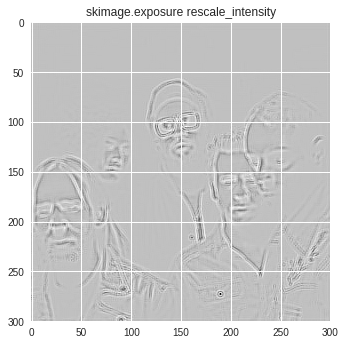

In [20]:
dog_filter = np.array([[1,1,1,1,1],[1,-3,-3,-3,1],[1,-3,8,-3,1],[1,-3,-3,-3,1],[1,1,1,1,1]])

C = nd.convolve(I_g,dog_filter)
Cr = nd.convolve(I_g_r,dog_filter)
plt.title('Original Image Grayscale')
plt.imshow(C)
plt.show()
plt.title('skimage.exposure rescale_intensity')
plt.imshow(Cr)
plt.show()

# Deep Convolutional Neural Networks



Use the softmax function to transform the following vector to probability values:

$\begin{bmatrix}
4&5&9&2
\end{bmatrix}$

In [0]:
import numpy as np

softmax1d = lambda y : np.exp(y)/np.sum(np.exp(y))

oneD = np.array([4.0, 5.0, 9.0, 2.0])


In [29]:
np.set_printoptions(suppress=True)
result = softmax1d(oneD)
print('Is the result close to 1?  ',np.sum(result))
print(result)

Is the result close to 1?   0.9999999999999998
[0.00656742 0.0178521  0.97469167 0.0008888 ]


Use the Keras library to classify the images of the MNIST-fashion dataset using a simple convolutional neural network. This dataset is just like MNIST but has grayscale images of different articles of clothing. It also has 10 classes, so any code that works on the MNIST dataset should work on this dataset without modification. I'll help you with the image preparation, and will limit the number of classes to 2 for fast training times. We will focus only on classifying pullovers and shirts.

In [30]:
%%time

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# What are the dimensions of a single image?
print(x_train[0].shape)

# input image dimensions
img_rows, img_cols = 28,28

if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")
    
print(K.image_data_format())

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

#Only look at 2s and 6s
num_classes = 2

# Create boolean arrays for train and test
train_picks = np.logical_or(y_train==2,y_train==6)
test_picks = np.logical_or(y_test==2,y_test==6)

# Filter train and test based on boolean arrays
x_train = x_train[train_picks]
x_test = x_test[test_picks]
y_train = np.array(y_train[train_picks]==2,dtype=int)
y_test = np.array(y_test[test_picks]==2,dtype=int)

# Scale pixel values to be floats between 0 and 1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

Using TensorFlow backend.


4423680/4422102 [==============================] - 0s 0us/step
(28, 28)
channels_first
x_train shape: (12000, 1, 28, 28)
12000 train samples
2000 test samples
CPU times: user 1.48 s, sys: 6.66 s, total: 8.14 s
Wall time: 10.7 s


In [32]:
%%time


model = Sequential()
model.add(Conv2D(4, kernel_size=(3, 3), activation='relu', input_shape=input_shape)) 
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) 

model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), metrics=['accuracy'])

np.random.seed(42)

CPU times: user 441 ms, sys: 410 ms, total: 851 ms
Wall time: 856 ms


In [36]:
%%time
# **** HYPERparameters ****
batch_size1 = 32 
#num_classes = 2
epochs1 = 100
fitted_model1 = model.fit(x_train, y_train, batch_size=batch_size1, epochs=epochs1, validation_data=(x_test, y_test), shuffle=True)

Train on 12000 samples, validate on 2000 samples
Epoch 1/100
12000/12000 [==============================] - 3s 264us/step - loss: 0.3097 - acc: 0.8690 - val_loss: 0.2702 - val_acc: 0.8920
Epoch 2/100
12000/12000 [==============================] - 3s 290us/step - loss: 0.2975 - acc: 0.8765 - val_loss: 0.2574 - val_acc: 0.8960
Epoch 3/100
12000/12000 [==============================] - 3s 285us/step - loss: 0.2898 - acc: 0.8800 - val_loss: 0.2608 - val_acc: 0.8905
Epoch 4/100
12000/12000 [==============================] - 3s 289us/step - loss: 0.2790 - acc: 0.8818 - val_loss: 0.2479 - val_acc: 0.9005
Epoch 5/100
 3008/12000 [======>.......................] - ETA: 2s - loss: 0.2736 - acc: 0.8863

12000/12000 [==============================] - 3s 283us/step - loss: 0.2688 - acc: 0.8879 - val_loss: 0.2439 - val_acc: 0.9000
Epoch 6/100
12000/12000 [==============================] - 3s 286us/step - loss: 0.2685 - acc: 0.8895 - val_loss: 0.2443 - val_acc: 0.9000
Epoch 7/100
12000/12000 [==============================] - 3s 287us/step - loss: 0.2651 - acc: 0.8921 - val_loss: 0.2360 - val_acc: 0.9025
Epoch 8/100
12000/12000 [==============================] - 3s 285us/step - loss: 0.2574 - acc: 0.8933 - val_loss: 0.2395 - val_acc: 0.8975
Epoch 9/100
 8224/12000 [===================>..........] - ETA: 1s - loss: 0.2480 - acc: 0.8975

12000/12000 [==============================] - 3s 284us/step - loss: 0.2531 - acc: 0.8953 - val_loss: 0.2442 - val_acc: 0.8920
Epoch 10/100
12000/12000 [==============================] - 3s 285us/step - loss: 0.2466 - acc: 0.8970 - val_loss: 0.2341 - val_acc: 0.9010
Epoch 11/100
12000/12000 [==============================] - 3s 285us/step - loss: 0.2454 - acc: 0.8987 - val_loss: 0.2291 - val_acc: 0.9050
Epoch 12/100
12000/12000 [==============================] - 3s 288us/step - loss: 0.2417 - acc: 0.8989 - val_loss: 0.2307 - val_acc: 0.9025
Epoch 13/100
 8832/12000 [=====================>........] - ETA: 0s - loss: 0.2454 - acc: 0.8933

12000/12000 [==============================] - 3s 286us/step - loss: 0.2424 - acc: 0.8946 - val_loss: 0.2314 - val_acc: 0.9080
Epoch 14/100
12000/12000 [==============================] - 3s 285us/step - loss: 0.2413 - acc: 0.8960 - val_loss: 0.2317 - val_acc: 0.9075
Epoch 15/100
12000/12000 [==============================] - 3s 285us/step - loss: 0.2398 - acc: 0.8997 - val_loss: 0.2254 - val_acc: 0.9125
Epoch 16/100
12000/12000 [==============================] - 3s 285us/step - loss: 0.2278 - acc: 0.9052 - val_loss: 0.2259 - val_acc: 0.9100
Epoch 17/100
 9088/12000 [=====================>........] - ETA: 0s - loss: 0.2314 - acc: 0.9015

12000/12000 [==============================] - 3s 284us/step - loss: 0.2325 - acc: 0.9022 - val_loss: 0.2302 - val_acc: 0.9030
Epoch 18/100
12000/12000 [==============================] - 3s 281us/step - loss: 0.2218 - acc: 0.9084 - val_loss: 0.2310 - val_acc: 0.9120
Epoch 19/100
12000/12000 [==============================] - 3s 283us/step - loss: 0.2272 - acc: 0.9030 - val_loss: 0.2224 - val_acc: 0.9110
Epoch 20/100
12000/12000 [==============================] - 3s 285us/step - loss: 0.2267 - acc: 0.9041 - val_loss: 0.2205 - val_acc: 0.9170
Epoch 21/100
 9312/12000 [======================>.......] - ETA: 0s - loss: 0.2232 - acc: 0.9030

12000/12000 [==============================] - 3s 280us/step - loss: 0.2219 - acc: 0.9038 - val_loss: 0.2265 - val_acc: 0.9090
Epoch 22/100
12000/12000 [==============================] - 3s 286us/step - loss: 0.2223 - acc: 0.9071 - val_loss: 0.2223 - val_acc: 0.9095
Epoch 23/100
12000/12000 [==============================] - 3s 282us/step - loss: 0.2194 - acc: 0.9062 - val_loss: 0.2335 - val_acc: 0.9075
Epoch 24/100
12000/12000 [==============================] - 3s 286us/step - loss: 0.2166 - acc: 0.9094 - val_loss: 0.2265 - val_acc: 0.9115
Epoch 25/100
 8960/12000 [=====================>........] - ETA: 0s - loss: 0.2125 - acc: 0.9128

12000/12000 [==============================] - 3s 286us/step - loss: 0.2130 - acc: 0.9102 - val_loss: 0.2252 - val_acc: 0.9060
Epoch 26/100
12000/12000 [==============================] - 3s 285us/step - loss: 0.2102 - acc: 0.9122 - val_loss: 0.2225 - val_acc: 0.9140
Epoch 27/100
12000/12000 [==============================] - 3s 282us/step - loss: 0.2130 - acc: 0.9114 - val_loss: 0.2176 - val_acc: 0.9160
Epoch 28/100
12000/12000 [==============================] - 3s 285us/step - loss: 0.2107 - acc: 0.9136 - val_loss: 0.2245 - val_acc: 0.9130
Epoch 29/100
 9248/12000 [======================>.......] - ETA: 0s - loss: 0.2112 - acc: 0.9124

12000/12000 [==============================] - 3s 283us/step - loss: 0.2143 - acc: 0.9120 - val_loss: 0.2151 - val_acc: 0.9105
Epoch 30/100
12000/12000 [==============================] - 3s 283us/step - loss: 0.2059 - acc: 0.9155 - val_loss: 0.2198 - val_acc: 0.9130
Epoch 31/100
12000/12000 [==============================] - 3s 281us/step - loss: 0.2042 - acc: 0.9130 - val_loss: 0.2285 - val_acc: 0.9060
Epoch 32/100
12000/12000 [==============================] - 3s 285us/step - loss: 0.2064 - acc: 0.9125 - val_loss: 0.2132 - val_acc: 0.9135
Epoch 33/100
 9344/12000 [======================>.......] - ETA: 0s - loss: 0.2085 - acc: 0.9148

12000/12000 [==============================] - 3s 285us/step - loss: 0.2057 - acc: 0.9157 - val_loss: 0.2232 - val_acc: 0.9200
Epoch 34/100
12000/12000 [==============================] - 3s 284us/step - loss: 0.2091 - acc: 0.9093 - val_loss: 0.2202 - val_acc: 0.9185
Epoch 35/100
12000/12000 [==============================] - 3s 285us/step - loss: 0.2003 - acc: 0.9160 - val_loss: 0.2252 - val_acc: 0.9130
Epoch 36/100
12000/12000 [==============================] - 3s 284us/step - loss: 0.1943 - acc: 0.9167 - val_loss: 0.2215 - val_acc: 0.9155
Epoch 37/100
 9024/12000 [=====================>........] - ETA: 0s - loss: 0.1985 - acc: 0.9177

12000/12000 [==============================] - 3s 286us/step - loss: 0.1996 - acc: 0.9175 - val_loss: 0.2173 - val_acc: 0.9190
Epoch 38/100
12000/12000 [==============================] - 3s 280us/step - loss: 0.1992 - acc: 0.9178 - val_loss: 0.2216 - val_acc: 0.9125
Epoch 39/100
12000/12000 [==============================] - 3s 285us/step - loss: 0.1960 - acc: 0.9163 - val_loss: 0.2123 - val_acc: 0.9205
Epoch 40/100
12000/12000 [==============================] - 3s 278us/step - loss: 0.1969 - acc: 0.9165 - val_loss: 0.2232 - val_acc: 0.9160
Epoch 41/100
 9728/12000 [=======================>......] - ETA: 0s - loss: 0.1969 - acc: 0.9151

12000/12000 [==============================] - 3s 284us/step - loss: 0.1961 - acc: 0.9151 - val_loss: 0.2221 - val_acc: 0.9135
Epoch 42/100
12000/12000 [==============================] - 3s 286us/step - loss: 0.1928 - acc: 0.9191 - val_loss: 0.2219 - val_acc: 0.9125
Epoch 43/100
12000/12000 [==============================] - 3s 285us/step - loss: 0.1946 - acc: 0.9177 - val_loss: 0.2228 - val_acc: 0.9185
Epoch 44/100
12000/12000 [==============================] - 3s 285us/step - loss: 0.1906 - acc: 0.9205 - val_loss: 0.2283 - val_acc: 0.9120
Epoch 45/100
 9088/12000 [=====================>........] - ETA: 0s - loss: 0.1919 - acc: 0.9181

12000/12000 [==============================] - 3s 287us/step - loss: 0.1924 - acc: 0.9167 - val_loss: 0.2225 - val_acc: 0.9100
Epoch 46/100
12000/12000 [==============================] - 3s 285us/step - loss: 0.1930 - acc: 0.9162 - val_loss: 0.2123 - val_acc: 0.9190
Epoch 47/100
12000/12000 [==============================] - 3s 287us/step - loss: 0.1898 - acc: 0.9192 - val_loss: 0.2161 - val_acc: 0.9185
Epoch 48/100
12000/12000 [==============================] - 3s 287us/step - loss: 0.1886 - acc: 0.9196 - val_loss: 0.2155 - val_acc: 0.9165
Epoch 49/100
 8448/12000 [====================>.........] - ETA: 0s - loss: 0.1896 - acc: 0.9175

12000/12000 [==============================] - 3s 284us/step - loss: 0.1868 - acc: 0.9196 - val_loss: 0.2316 - val_acc: 0.9145
Epoch 50/100
12000/12000 [==============================] - 3s 284us/step - loss: 0.1893 - acc: 0.9201 - val_loss: 0.2214 - val_acc: 0.9160
Epoch 51/100
12000/12000 [==============================] - 3s 284us/step - loss: 0.1902 - acc: 0.9192 - val_loss: 0.2192 - val_acc: 0.9200
Epoch 52/100
12000/12000 [==============================] - 3s 285us/step - loss: 0.1867 - acc: 0.9207 - val_loss: 0.2206 - val_acc: 0.9175
Epoch 53/100
 9216/12000 [======================>.......] - ETA: 0s - loss: 0.1879 - acc: 0.9208

12000/12000 [==============================] - 3s 286us/step - loss: 0.1850 - acc: 0.9195 - val_loss: 0.2311 - val_acc: 0.9155
Epoch 54/100
12000/12000 [==============================] - 3s 285us/step - loss: 0.1859 - acc: 0.9189 - val_loss: 0.2242 - val_acc: 0.9180
Epoch 55/100
12000/12000 [==============================] - 3s 284us/step - loss: 0.1869 - acc: 0.9207 - val_loss: 0.2248 - val_acc: 0.9160
Epoch 56/100
12000/12000 [==============================] - 3s 284us/step - loss: 0.1895 - acc: 0.9182 - val_loss: 0.2208 - val_acc: 0.9165
Epoch 57/100
 9216/12000 [======================>.......] - ETA: 0s - loss: 0.1926 - acc: 0.9153

12000/12000 [==============================] - 3s 283us/step - loss: 0.1862 - acc: 0.9198 - val_loss: 0.2246 - val_acc: 0.9185
Epoch 58/100
12000/12000 [==============================] - 3s 280us/step - loss: 0.1822 - acc: 0.9215 - val_loss: 0.2348 - val_acc: 0.9130
Epoch 59/100
12000/12000 [==============================] - 3s 284us/step - loss: 0.1801 - acc: 0.9208 - val_loss: 0.2169 - val_acc: 0.9170
Epoch 60/100
12000/12000 [==============================] - 3s 286us/step - loss: 0.1810 - acc: 0.9218 - val_loss: 0.2212 - val_acc: 0.9115
Epoch 61/100
 9024/12000 [=====================>........] - ETA: 0s - loss: 0.1696 - acc: 0.9246

12000/12000 [==============================] - 3s 286us/step - loss: 0.1766 - acc: 0.9217 - val_loss: 0.2238 - val_acc: 0.9170
Epoch 62/100
12000/12000 [==============================] - 3s 282us/step - loss: 0.1814 - acc: 0.9207 - val_loss: 0.2151 - val_acc: 0.9215
Epoch 63/100
12000/12000 [==============================] - 3s 285us/step - loss: 0.1809 - acc: 0.9226 - val_loss: 0.2159 - val_acc: 0.9160
Epoch 64/100
12000/12000 [==============================] - 3s 287us/step - loss: 0.1833 - acc: 0.9218 - val_loss: 0.2176 - val_acc: 0.9125
Epoch 65/100
 9312/12000 [======================>.......] - ETA: 0s - loss: 0.1773 - acc: 0.9236

12000/12000 [==============================] - 3s 283us/step - loss: 0.1794 - acc: 0.9217 - val_loss: 0.2151 - val_acc: 0.9220
Epoch 66/100
12000/12000 [==============================] - 3s 285us/step - loss: 0.1861 - acc: 0.9204 - val_loss: 0.2203 - val_acc: 0.9155
Epoch 67/100
12000/12000 [==============================] - 3s 285us/step - loss: 0.1796 - acc: 0.9228 - val_loss: 0.2242 - val_acc: 0.9195
Epoch 68/100
12000/12000 [==============================] - 3s 283us/step - loss: 0.1855 - acc: 0.9213 - val_loss: 0.2292 - val_acc: 0.9130
Epoch 69/100
 9312/12000 [======================>.......] - ETA: 0s - loss: 0.1767 - acc: 0.9235

12000/12000 [==============================] - 3s 285us/step - loss: 0.1782 - acc: 0.9235 - val_loss: 0.2308 - val_acc: 0.9150
Epoch 70/100
12000/12000 [==============================] - 3s 287us/step - loss: 0.1783 - acc: 0.9240 - val_loss: 0.2312 - val_acc: 0.9125
Epoch 71/100
12000/12000 [==============================] - 3s 285us/step - loss: 0.1752 - acc: 0.9248 - val_loss: 0.2195 - val_acc: 0.9205
Epoch 72/100
12000/12000 [==============================] - 3s 287us/step - loss: 0.1758 - acc: 0.9219 - val_loss: 0.2190 - val_acc: 0.9170
Epoch 73/100
 9056/12000 [=====================>........] - ETA: 0s - loss: 0.1772 - acc: 0.9222

12000/12000 [==============================] - 3s 281us/step - loss: 0.1802 - acc: 0.9212 - val_loss: 0.2282 - val_acc: 0.9120
Epoch 74/100
12000/12000 [==============================] - 3s 283us/step - loss: 0.1860 - acc: 0.9198 - val_loss: 0.2281 - val_acc: 0.9170
Epoch 75/100
12000/12000 [==============================] - 3s 280us/step - loss: 0.1770 - acc: 0.9224 - val_loss: 0.2260 - val_acc: 0.9170
Epoch 76/100
12000/12000 [==============================] - 3s 282us/step - loss: 0.1748 - acc: 0.9222 - val_loss: 0.2298 - val_acc: 0.9155
Epoch 77/100
 9856/12000 [=======================>......] - ETA: 0s - loss: 0.1729 - acc: 0.9267

12000/12000 [==============================] - 3s 281us/step - loss: 0.1734 - acc: 0.9256 - val_loss: 0.2206 - val_acc: 0.9210
Epoch 78/100
12000/12000 [==============================] - 3s 280us/step - loss: 0.1787 - acc: 0.9217 - val_loss: 0.2207 - val_acc: 0.9170
Epoch 79/100
12000/12000 [==============================] - 3s 280us/step - loss: 0.1760 - acc: 0.9245 - val_loss: 0.2243 - val_acc: 0.9170
Epoch 80/100
12000/12000 [==============================] - 3s 282us/step - loss: 0.1682 - acc: 0.9260 - val_loss: 0.2290 - val_acc: 0.9140
Epoch 81/100
10176/12000 [========================>.....] - ETA: 0s - loss: 0.1699 - acc: 0.9236

12000/12000 [==============================] - 3s 279us/step - loss: 0.1722 - acc: 0.9219 - val_loss: 0.2286 - val_acc: 0.9155
Epoch 82/100
12000/12000 [==============================] - 3s 278us/step - loss: 0.1755 - acc: 0.9219 - val_loss: 0.2219 - val_acc: 0.9180
Epoch 83/100
12000/12000 [==============================] - 3s 280us/step - loss: 0.1737 - acc: 0.9227 - val_loss: 0.2233 - val_acc: 0.9200
Epoch 84/100
12000/12000 [==============================] - 3s 282us/step - loss: 0.1762 - acc: 0.9252 - val_loss: 0.2367 - val_acc: 0.9175
Epoch 85/100
10304/12000 [========================>.....] - ETA: 0s - loss: 0.1676 - acc: 0.9266

12000/12000 [==============================] - 3s 275us/step - loss: 0.1677 - acc: 0.9259 - val_loss: 0.2356 - val_acc: 0.9165
Epoch 86/100
12000/12000 [==============================] - 3s 270us/step - loss: 0.1717 - acc: 0.9242 - val_loss: 0.2275 - val_acc: 0.9180
Epoch 87/100
12000/12000 [==============================] - 3s 266us/step - loss: 0.1732 - acc: 0.9231 - val_loss: 0.2276 - val_acc: 0.9175
Epoch 88/100
12000/12000 [==============================] - 3s 266us/step - loss: 0.1699 - acc: 0.9222 - val_loss: 0.2268 - val_acc: 0.9145
Epoch 89/100
12000/12000 [==============================] - 3s 268us/step - loss: 0.1711 - acc: 0.9242 - val_loss: 0.2331 - val_acc: 0.9190


Epoch 90/100
12000/12000 [==============================] - 3s 268us/step - loss: 0.1655 - acc: 0.9283 - val_loss: 0.2305 - val_acc: 0.9170
Epoch 91/100
12000/12000 [==============================] - 3s 265us/step - loss: 0.1672 - acc: 0.9273 - val_loss: 0.2197 - val_acc: 0.9155
Epoch 92/100
12000/12000 [==============================] - 3s 268us/step - loss: 0.1717 - acc: 0.9260 - val_loss: 0.2174 - val_acc: 0.9185
Epoch 93/100
12000/12000 [==============================] - 3s 268us/step - loss: 0.1706 - acc: 0.9232 - val_loss: 0.2161 - val_acc: 0.9190
Epoch 94/100
 9120/12000 [=====================>........] - ETA: 0s - loss: 0.1702 - acc: 0.9230

12000/12000 [==============================] - 3s 271us/step - loss: 0.1715 - acc: 0.9231 - val_loss: 0.2330 - val_acc: 0.9160
Epoch 95/100
12000/12000 [==============================] - 3s 276us/step - loss: 0.1697 - acc: 0.9239 - val_loss: 0.2233 - val_acc: 0.9205
Epoch 96/100
12000/12000 [==============================] - 3s 280us/step - loss: 0.1673 - acc: 0.9273 - val_loss: 0.2433 - val_acc: 0.9190
Epoch 97/100
12000/12000 [==============================] - 3s 274us/step - loss: 0.1706 - acc: 0.9265 - val_loss: 0.2280 - val_acc: 0.9165
Epoch 98/100
10816/12000 [==========================>...] - ETA: 0s - loss: 0.1649 - acc: 0.9260

12000/12000 [==============================] - 3s 274us/step - loss: 0.1634 - acc: 0.9265 - val_loss: 0.2333 - val_acc: 0.9180
Epoch 99/100
12000/12000 [==============================] - 3s 277us/step - loss: 0.1671 - acc: 0.9242 - val_loss: 0.2340 - val_acc: 0.9160
Epoch 100/100
12000/12000 [==============================] - 3s 283us/step - loss: 0.1670 - acc: 0.9271 - val_loss: 0.2368 - val_acc: 0.9150
CPU times: user 5min 58s, sys: 1min 17s, total: 7min 15s
Wall time: 5min 38s


In [37]:
print(fitted_model1.history.keys())


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


Plot your validation and test accuracies by epoch.

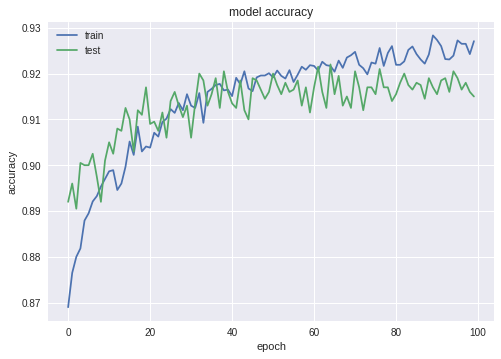

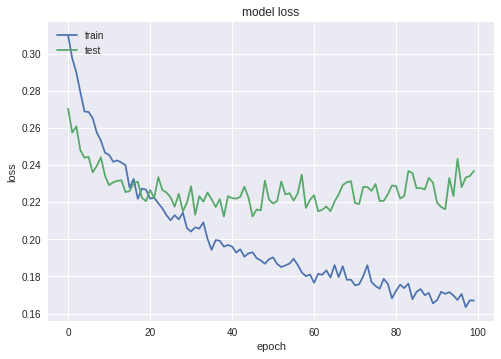

In [38]:
# summarize history for accuracy
plt.plot(fitted_model1.history['acc'])
plt.plot(fitted_model1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(fitted_model1.history['loss'])
plt.plot(fitted_model1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [39]:
%%time
model = Sequential()

model.add(Conv2D(4, kernel_size=(3, 3), activation='relu', input_shape=input_shape)) 
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) 

model.add(Conv2D(4, kernel_size=(3, 3), activation='relu', input_shape=input_shape)) 
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) 

model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), metrics=['accuracy'])

np.random.seed(42)

CPU times: user 189 ms, sys: 4 ms, total: 193 ms
Wall time: 196 ms


In [40]:
%%time
batch_size2 = 32 
#num_classes = 2
epochs2 = 100
fitted_model2 = model.fit(x_train, y_train, batch_size=batch_size2, epochs=epochs2, validation_data=(x_test, y_test), shuffle=True)

Train on 12000 samples, validate on 2000 samples
Epoch 1/100
12000/12000 [==============================] - 4s 365us/step - loss: 0.6440 - acc: 0.6145 - val_loss: 0.5199 - val_acc: 0.7520
Epoch 2/100
12000/12000 [==============================] - 4s 339us/step - loss: 0.5105 - acc: 0.7624 - val_loss: 0.4576 - val_acc: 0.8025
Epoch 3/100
12000/12000 [==============================] - 4s 337us/step - loss: 0.4663 - acc: 0.7975 - val_loss: 0.4121 - val_acc: 0.8285
Epoch 4/100
11264/12000 [===========================>..] - ETA: 0s - loss: 0.4349 - acc: 0.8110

12000/12000 [==============================] - 4s 338us/step - loss: 0.4374 - acc: 0.8098 - val_loss: 0.3865 - val_acc: 0.8490
Epoch 5/100
12000/12000 [==============================] - 4s 336us/step - loss: 0.4157 - acc: 0.8256 - val_loss: 0.3620 - val_acc: 0.8435
Epoch 6/100
12000/12000 [==============================] - 4s 338us/step - loss: 0.4051 - acc: 0.8359 - val_loss: 0.3433 - val_acc: 0.8590
Epoch 7/100
12000/12000 [==============================] - 4s 336us/step - loss: 0.3801 - acc: 0.8423 - val_loss: 0.3416 - val_acc: 0.8530
Epoch 8/100
 5344/12000 [============>.................] - ETA: 2s - loss: 0.3827 - acc: 0.8413

12000/12000 [==============================] - 4s 338us/step - loss: 0.3790 - acc: 0.8432 - val_loss: 0.3198 - val_acc: 0.8655
Epoch 9/100
12000/12000 [==============================] - 4s 342us/step - loss: 0.3686 - acc: 0.8502 - val_loss: 0.3171 - val_acc: 0.8620
Epoch 10/100
12000/12000 [==============================] - 4s 341us/step - loss: 0.3614 - acc: 0.8517 - val_loss: 0.3169 - val_acc: 0.8680
Epoch 11/100
12000/12000 [==============================] - 4s 341us/step - loss: 0.3578 - acc: 0.8523 - val_loss: 0.2949 - val_acc: 0.8740
Epoch 12/100
 3424/12000 [=======>......................] - ETA: 2s - loss: 0.3550 - acc: 0.8543

12000/12000 [==============================] - 4s 343us/step - loss: 0.3517 - acc: 0.8567 - val_loss: 0.2923 - val_acc: 0.8755
Epoch 13/100
12000/12000 [==============================] - 4s 350us/step - loss: 0.3431 - acc: 0.8619 - val_loss: 0.2987 - val_acc: 0.8755
Epoch 14/100
12000/12000 [==============================] - 4s 344us/step - loss: 0.3440 - acc: 0.8603 - val_loss: 0.2922 - val_acc: 0.8770
Epoch 15/100
12000/12000 [==============================] - 4s 345us/step - loss: 0.3355 - acc: 0.8640 - val_loss: 0.2771 - val_acc: 0.8845
Epoch 16/100
 3296/12000 [=======>......................] - ETA: 2s - loss: 0.3361 - acc: 0.8683

12000/12000 [==============================] - 4s 339us/step - loss: 0.3335 - acc: 0.8667 - val_loss: 0.3032 - val_acc: 0.8655
Epoch 17/100
12000/12000 [==============================] - 4s 346us/step - loss: 0.3297 - acc: 0.8708 - val_loss: 0.2916 - val_acc: 0.8805
Epoch 18/100
12000/12000 [==============================] - 4s 348us/step - loss: 0.3221 - acc: 0.8729 - val_loss: 0.2711 - val_acc: 0.8815
Epoch 19/100
12000/12000 [==============================] - 4s 343us/step - loss: 0.3279 - acc: 0.8694 - val_loss: 0.2658 - val_acc: 0.8875
Epoch 20/100
 3328/12000 [=======>......................] - ETA: 2s - loss: 0.3169 - acc: 0.8723

12000/12000 [==============================] - 4s 344us/step - loss: 0.3228 - acc: 0.8732 - val_loss: 0.2811 - val_acc: 0.8795
Epoch 21/100
12000/12000 [==============================] - 4s 345us/step - loss: 0.3170 - acc: 0.8715 - val_loss: 0.2688 - val_acc: 0.8870
Epoch 22/100
12000/12000 [==============================] - 4s 342us/step - loss: 0.3185 - acc: 0.8707 - val_loss: 0.2597 - val_acc: 0.8895
Epoch 23/100
12000/12000 [==============================] - 4s 341us/step - loss: 0.3116 - acc: 0.8743 - val_loss: 0.2608 - val_acc: 0.8875
Epoch 24/100
 3168/12000 [======>.......................] - ETA: 2s - loss: 0.3065 - acc: 0.8788

12000/12000 [==============================] - 4s 342us/step - loss: 0.3111 - acc: 0.8748 - val_loss: 0.2650 - val_acc: 0.8850
Epoch 25/100
12000/12000 [==============================] - 4s 343us/step - loss: 0.3113 - acc: 0.8775 - val_loss: 0.2601 - val_acc: 0.8880
Epoch 26/100
12000/12000 [==============================] - 4s 340us/step - loss: 0.3090 - acc: 0.8779 - val_loss: 0.2531 - val_acc: 0.8920
Epoch 27/100
12000/12000 [==============================] - 4s 346us/step - loss: 0.3033 - acc: 0.8798 - val_loss: 0.2632 - val_acc: 0.8845
Epoch 28/100
 3264/12000 [=======>......................] - ETA: 2s - loss: 0.3060 - acc: 0.8805

12000/12000 [==============================] - 4s 346us/step - loss: 0.3094 - acc: 0.8748 - val_loss: 0.2549 - val_acc: 0.8940
Epoch 29/100
12000/12000 [==============================] - 4s 344us/step - loss: 0.2877 - acc: 0.8857 - val_loss: 0.2561 - val_acc: 0.8940
Epoch 30/100
12000/12000 [==============================] - 4s 344us/step - loss: 0.3034 - acc: 0.8797 - val_loss: 0.2658 - val_acc: 0.8875
Epoch 31/100
12000/12000 [==============================] - 4s 345us/step - loss: 0.2933 - acc: 0.8838 - val_loss: 0.2496 - val_acc: 0.8960
Epoch 32/100
 3456/12000 [=======>......................] - ETA: 2s - loss: 0.2938 - acc: 0.8808

12000/12000 [==============================] - 4s 340us/step - loss: 0.2963 - acc: 0.8806 - val_loss: 0.2584 - val_acc: 0.8860
Epoch 33/100
12000/12000 [==============================] - 4s 342us/step - loss: 0.2983 - acc: 0.8764 - val_loss: 0.2574 - val_acc: 0.8885
Epoch 34/100
12000/12000 [==============================] - 4s 347us/step - loss: 0.2972 - acc: 0.8811 - val_loss: 0.2501 - val_acc: 0.8925
Epoch 35/100
12000/12000 [==============================] - 4s 343us/step - loss: 0.2928 - acc: 0.8807 - val_loss: 0.2524 - val_acc: 0.8935
Epoch 36/100
 3136/12000 [======>.......................] - ETA: 2s - loss: 0.2985 - acc: 0.8833

12000/12000 [==============================] - 4s 345us/step - loss: 0.2953 - acc: 0.8809 - val_loss: 0.2466 - val_acc: 0.8910
Epoch 37/100
12000/12000 [==============================] - 4s 343us/step - loss: 0.2919 - acc: 0.8840 - val_loss: 0.2442 - val_acc: 0.8925
Epoch 38/100
12000/12000 [==============================] - 4s 343us/step - loss: 0.2969 - acc: 0.8804 - val_loss: 0.2490 - val_acc: 0.8980
Epoch 39/100
12000/12000 [==============================] - 4s 346us/step - loss: 0.2951 - acc: 0.8821 - val_loss: 0.2531 - val_acc: 0.8960
Epoch 40/100
 3072/12000 [======>.......................] - ETA: 2s - loss: 0.3095 - acc: 0.8750

12000/12000 [==============================] - 4s 347us/step - loss: 0.2917 - acc: 0.8837 - val_loss: 0.2477 - val_acc: 0.8995
Epoch 41/100
12000/12000 [==============================] - 4s 342us/step - loss: 0.2894 - acc: 0.8819 - val_loss: 0.2504 - val_acc: 0.8965
Epoch 42/100
12000/12000 [==============================] - 4s 342us/step - loss: 0.2903 - acc: 0.8827 - val_loss: 0.2514 - val_acc: 0.8910
Epoch 43/100
12000/12000 [==============================] - 4s 345us/step - loss: 0.2840 - acc: 0.8852 - val_loss: 0.2516 - val_acc: 0.8970
Epoch 44/100
 3136/12000 [======>.......................] - ETA: 2s - loss: 0.2835 - acc: 0.8858

12000/12000 [==============================] - 4s 345us/step - loss: 0.2852 - acc: 0.8866 - val_loss: 0.2380 - val_acc: 0.9000
Epoch 45/100
12000/12000 [==============================] - 4s 344us/step - loss: 0.2887 - acc: 0.8796 - val_loss: 0.2402 - val_acc: 0.9000
Epoch 46/100
12000/12000 [==============================] - 4s 343us/step - loss: 0.2837 - acc: 0.8827 - val_loss: 0.2420 - val_acc: 0.8960
Epoch 47/100
12000/12000 [==============================] - 4s 346us/step - loss: 0.2844 - acc: 0.8866 - val_loss: 0.2501 - val_acc: 0.8955
Epoch 48/100
 3296/12000 [=======>......................] - ETA: 2s - loss: 0.3174 - acc: 0.8714

12000/12000 [==============================] - 4s 346us/step - loss: 0.2927 - acc: 0.8822 - val_loss: 0.2510 - val_acc: 0.8945
Epoch 49/100
12000/12000 [==============================] - 4s 345us/step - loss: 0.2806 - acc: 0.8858 - val_loss: 0.2514 - val_acc: 0.8960
Epoch 50/100
12000/12000 [==============================] - 4s 346us/step - loss: 0.2885 - acc: 0.8879 - val_loss: 0.2505 - val_acc: 0.8955
Epoch 51/100
12000/12000 [==============================] - 4s 348us/step - loss: 0.2856 - acc: 0.8872 - val_loss: 0.2429 - val_acc: 0.8990
Epoch 52/100
 3200/12000 [=======>......................] - ETA: 2s - loss: 0.2776 - acc: 0.8878

12000/12000 [==============================] - 4s 346us/step - loss: 0.2835 - acc: 0.8863 - val_loss: 0.2459 - val_acc: 0.8925
Epoch 53/100
12000/12000 [==============================] - 4s 342us/step - loss: 0.2863 - acc: 0.8858 - val_loss: 0.2452 - val_acc: 0.8940
Epoch 54/100
12000/12000 [==============================] - 4s 342us/step - loss: 0.2821 - acc: 0.8889 - val_loss: 0.2424 - val_acc: 0.8995
Epoch 55/100
12000/12000 [==============================] - 4s 346us/step - loss: 0.2838 - acc: 0.8876 - val_loss: 0.2434 - val_acc: 0.8960
Epoch 56/100
 3520/12000 [=======>......................] - ETA: 2s - loss: 0.2658 - acc: 0.8935

12000/12000 [==============================] - 4s 344us/step - loss: 0.2822 - acc: 0.8877 - val_loss: 0.2477 - val_acc: 0.8925
Epoch 57/100
12000/12000 [==============================] - 4s 348us/step - loss: 0.2791 - acc: 0.8883 - val_loss: 0.2470 - val_acc: 0.8950
Epoch 58/100
12000/12000 [==============================] - 4s 344us/step - loss: 0.2851 - acc: 0.8859 - val_loss: 0.2423 - val_acc: 0.8925
Epoch 59/100
12000/12000 [==============================] - 4s 345us/step - loss: 0.2747 - acc: 0.8870 - val_loss: 0.2357 - val_acc: 0.9015
Epoch 60/100
 3296/12000 [=======>......................] - ETA: 2s - loss: 0.2790 - acc: 0.8853

12000/12000 [==============================] - 4s 346us/step - loss: 0.2776 - acc: 0.8869 - val_loss: 0.2388 - val_acc: 0.8970
Epoch 61/100
12000/12000 [==============================] - 4s 345us/step - loss: 0.2754 - acc: 0.8901 - val_loss: 0.2489 - val_acc: 0.8970
Epoch 62/100
12000/12000 [==============================] - 4s 345us/step - loss: 0.2790 - acc: 0.8864 - val_loss: 0.2472 - val_acc: 0.8950
Epoch 63/100
12000/12000 [==============================] - 4s 348us/step - loss: 0.2785 - acc: 0.8880 - val_loss: 0.2431 - val_acc: 0.8960
Epoch 64/100
 2976/12000 [======>.......................] - ETA: 3s - loss: 0.2743 - acc: 0.8935

12000/12000 [==============================] - 4s 345us/step - loss: 0.2780 - acc: 0.8844 - val_loss: 0.2379 - val_acc: 0.8950
Epoch 65/100
12000/12000 [==============================] - 4s 342us/step - loss: 0.2773 - acc: 0.8913 - val_loss: 0.2404 - val_acc: 0.8975
Epoch 66/100
12000/12000 [==============================] - 4s 345us/step - loss: 0.2772 - acc: 0.8865 - val_loss: 0.2380 - val_acc: 0.8985
Epoch 67/100
12000/12000 [==============================] - 4s 342us/step - loss: 0.2774 - acc: 0.8880 - val_loss: 0.2317 - val_acc: 0.8995
Epoch 68/100
 3296/12000 [=======>......................] - ETA: 2s - loss: 0.2727 - acc: 0.8944

12000/12000 [==============================] - 4s 343us/step - loss: 0.2772 - acc: 0.8884 - val_loss: 0.2332 - val_acc: 0.9010
Epoch 69/100
12000/12000 [==============================] - 4s 343us/step - loss: 0.2729 - acc: 0.8888 - val_loss: 0.2364 - val_acc: 0.8980
Epoch 70/100
12000/12000 [==============================] - 4s 342us/step - loss: 0.2771 - acc: 0.8880 - val_loss: 0.2400 - val_acc: 0.9025
Epoch 71/100
12000/12000 [==============================] - 4s 344us/step - loss: 0.2713 - acc: 0.8917 - val_loss: 0.2341 - val_acc: 0.8995
Epoch 72/100
 3744/12000 [========>.....................] - ETA: 2s - loss: 0.2659 - acc: 0.8969

12000/12000 [==============================] - 4s 336us/step - loss: 0.2727 - acc: 0.8939 - val_loss: 0.2442 - val_acc: 0.8950
Epoch 73/100
12000/12000 [==============================] - 4s 343us/step - loss: 0.2789 - acc: 0.8887 - val_loss: 0.2386 - val_acc: 0.9015
Epoch 74/100
12000/12000 [==============================] - 4s 346us/step - loss: 0.2678 - acc: 0.8897 - val_loss: 0.2371 - val_acc: 0.8980
Epoch 75/100
12000/12000 [==============================] - 4s 347us/step - loss: 0.2708 - acc: 0.8910 - val_loss: 0.2378 - val_acc: 0.8955
Epoch 76/100
 3296/12000 [=======>......................] - ETA: 2s - loss: 0.2758 - acc: 0.8902

12000/12000 [==============================] - 4s 345us/step - loss: 0.2737 - acc: 0.8909 - val_loss: 0.2361 - val_acc: 0.8975
Epoch 77/100
12000/12000 [==============================] - 4s 345us/step - loss: 0.2738 - acc: 0.8919 - val_loss: 0.2283 - val_acc: 0.8995
Epoch 78/100
12000/12000 [==============================] - 4s 347us/step - loss: 0.2710 - acc: 0.8886 - val_loss: 0.2375 - val_acc: 0.8975
Epoch 79/100
12000/12000 [==============================] - 4s 348us/step - loss: 0.2690 - acc: 0.8921 - val_loss: 0.2382 - val_acc: 0.8960
Epoch 80/100
 3104/12000 [======>.......................] - ETA: 2s - loss: 0.2672 - acc: 0.8937

12000/12000 [==============================] - 4s 342us/step - loss: 0.2652 - acc: 0.8938 - val_loss: 0.2412 - val_acc: 0.8965
Epoch 81/100
12000/12000 [==============================] - 4s 348us/step - loss: 0.2718 - acc: 0.8902 - val_loss: 0.2292 - val_acc: 0.9015
Epoch 82/100
12000/12000 [==============================] - 4s 351us/step - loss: 0.2665 - acc: 0.8911 - val_loss: 0.2335 - val_acc: 0.9035
Epoch 83/100
12000/12000 [==============================] - 4s 345us/step - loss: 0.2658 - acc: 0.8916 - val_loss: 0.2329 - val_acc: 0.8990
Epoch 84/100
 2592/12000 [=====>........................] - ETA: 3s - loss: 0.2756 - acc: 0.8927

12000/12000 [==============================] - 4s 344us/step - loss: 0.2687 - acc: 0.8947 - val_loss: 0.2320 - val_acc: 0.9035
Epoch 85/100
12000/12000 [==============================] - 4s 344us/step - loss: 0.2724 - acc: 0.8935 - val_loss: 0.2420 - val_acc: 0.8955
Epoch 86/100
12000/12000 [==============================] - 4s 346us/step - loss: 0.2683 - acc: 0.8929 - val_loss: 0.2300 - val_acc: 0.9025
Epoch 87/100
12000/12000 [==============================] - 4s 345us/step - loss: 0.2748 - acc: 0.8908 - val_loss: 0.2451 - val_acc: 0.8975
Epoch 88/100
 3264/12000 [=======>......................] - ETA: 2s - loss: 0.2739 - acc: 0.8900

12000/12000 [==============================] - 4s 342us/step - loss: 0.2625 - acc: 0.8952 - val_loss: 0.2401 - val_acc: 0.8980
Epoch 89/100
12000/12000 [==============================] - 4s 350us/step - loss: 0.2633 - acc: 0.8967 - val_loss: 0.2410 - val_acc: 0.8930
Epoch 90/100
12000/12000 [==============================] - 4s 347us/step - loss: 0.2621 - acc: 0.8946 - val_loss: 0.2244 - val_acc: 0.9065
Epoch 91/100
12000/12000 [==============================] - 4s 347us/step - loss: 0.2634 - acc: 0.8934 - val_loss: 0.2296 - val_acc: 0.9045
Epoch 92/100
 2912/12000 [======>.......................] - ETA: 2s - loss: 0.2431 - acc: 0.9025

12000/12000 [==============================] - 4s 345us/step - loss: 0.2604 - acc: 0.8986 - val_loss: 0.2344 - val_acc: 0.8995
Epoch 93/100
12000/12000 [==============================] - 4s 348us/step - loss: 0.2600 - acc: 0.8968 - val_loss: 0.2370 - val_acc: 0.8975
Epoch 94/100
12000/12000 [==============================] - 4s 349us/step - loss: 0.2679 - acc: 0.8958 - val_loss: 0.2426 - val_acc: 0.8915
Epoch 95/100
12000/12000 [==============================] - 4s 354us/step - loss: 0.2643 - acc: 0.8937 - val_loss: 0.2393 - val_acc: 0.8990
Epoch 96/100
 2560/12000 [=====>........................] - ETA: 3s - loss: 0.2647 - acc: 0.9047

12000/12000 [==============================] - 4s 351us/step - loss: 0.2670 - acc: 0.8945 - val_loss: 0.2374 - val_acc: 0.9035
Epoch 97/100
12000/12000 [==============================] - 4s 349us/step - loss: 0.2665 - acc: 0.8936 - val_loss: 0.2348 - val_acc: 0.8935
Epoch 98/100
12000/12000 [==============================] - 4s 352us/step - loss: 0.2598 - acc: 0.8947 - val_loss: 0.2413 - val_acc: 0.8945
Epoch 99/100
12000/12000 [==============================] - 4s 347us/step - loss: 0.2683 - acc: 0.8912 - val_loss: 0.2336 - val_acc: 0.8965
Epoch 100/100
 2592/12000 [=====>........................] - ETA: 3s - loss: 0.2466 - acc: 0.9016

12000/12000 [==============================] - 4s 349us/step - loss: 0.2601 - acc: 0.8954 - val_loss: 0.2365 - val_acc: 0.8975
CPU times: user 7min 1s, sys: 1min 32s, total: 8min 34s
Wall time: 6min 54s


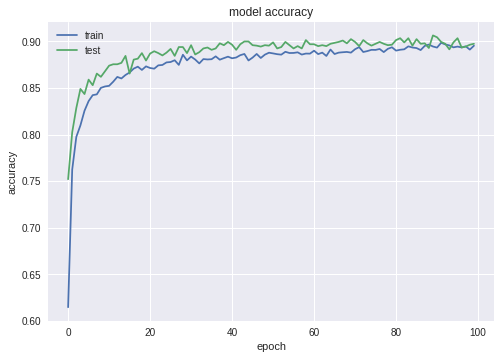

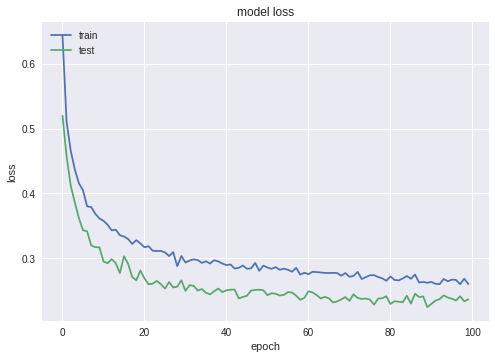

In [41]:
# summarize history for accuracy
plt.plot(fitted_model2.history['acc'])
plt.plot(fitted_model2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(fitted_model2.history['loss'])
plt.plot(fitted_model2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [42]:
%%time
model = Sequential()

model.add(Conv2D(4, kernel_size=(3, 3), activation='relu', input_shape=input_shape)) 
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) 

model.add(Conv2D(4, kernel_size=(3, 3), activation='relu', input_shape=input_shape)) 
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) 

model.add(Conv2D(4, kernel_size=(3, 3), padding='same',activation='relu', input_shape=input_shape)) 
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # This causes an error ******** added `padding='same' ^^^^
model.add(Dropout(0.25)) 

model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), metrics=['accuracy'])

np.random.seed(42)

CPU times: user 236 ms, sys: 1 ms, total: 237 ms
Wall time: 236 ms


In [43]:
%%time
batch_size3 = 32 
#num_classes = 2
epochs3 = 100
fitted_model3 = model.fit(x_train, y_train, batch_size=batch_size3, epochs=epochs3, validation_data=(x_test, y_test), shuffle=True)


Train on 12000 samples, validate on 2000 samples
Epoch 1/100
12000/12000 [==============================] - 6s 462us/step - loss: 0.6221 - acc: 0.6537 - val_loss: 0.5021 - val_acc: 0.7715
Epoch 2/100
12000/12000 [==============================] - 5s 415us/step - loss: 0.5281 - acc: 0.7621 - val_loss: 0.4590 - val_acc: 0.8070
Epoch 3/100
12000/12000 [==============================] - 5s 421us/step - loss: 0.4866 - acc: 0.7856 - val_loss: 0.4324 - val_acc: 0.8095
Epoch 4/100
 6272/12000 [==============>...............] - ETA: 2s - loss: 0.4703 - acc: 0.7977

12000/12000 [==============================] - 5s 416us/step - loss: 0.4653 - acc: 0.8013 - val_loss: 0.4507 - val_acc: 0.7860
Epoch 5/100
12000/12000 [==============================] - 5s 421us/step - loss: 0.4467 - acc: 0.8157 - val_loss: 0.3837 - val_acc: 0.8355
Epoch 6/100
12000/12000 [==============================] - 5s 406us/step - loss: 0.4243 - acc: 0.8255 - val_loss: 0.3610 - val_acc: 0.8450
Epoch 7/100
12000/12000 [==============================] - 5s 423us/step - loss: 0.4164 - acc: 0.8287 - val_loss: 0.3472 - val_acc: 0.8550
Epoch 8/100
   32/12000 [..............................] - ETA: 7s - loss: 0.3400 - acc: 0.8438

12000/12000 [==============================] - 5s 419us/step - loss: 0.4017 - acc: 0.8389 - val_loss: 0.3540 - val_acc: 0.8550
Epoch 9/100
12000/12000 [==============================] - 5s 424us/step - loss: 0.3947 - acc: 0.8417 - val_loss: 0.3369 - val_acc: 0.8595
Epoch 10/100
12000/12000 [==============================] - 5s 420us/step - loss: 0.3865 - acc: 0.8458 - val_loss: 0.3265 - val_acc: 0.8685
Epoch 11/100
11200/12000 [===========================>..] - ETA: 0s - loss: 0.3751 - acc: 0.8546

12000/12000 [==============================] - 5s 414us/step - loss: 0.3778 - acc: 0.8525 - val_loss: 0.3304 - val_acc: 0.8740
Epoch 12/100
12000/12000 [==============================] - 5s 416us/step - loss: 0.3737 - acc: 0.8524 - val_loss: 0.3198 - val_acc: 0.8710
Epoch 13/100
12000/12000 [==============================] - 5s 412us/step - loss: 0.3670 - acc: 0.8568 - val_loss: 0.3134 - val_acc: 0.8770
Epoch 14/100
12000/12000 [==============================] - 5s 416us/step - loss: 0.3610 - acc: 0.8580 - val_loss: 0.3109 - val_acc: 0.8715
Epoch 15/100
  768/12000 [>.............................] - ETA: 4s - loss: 0.3309 - acc: 0.8828

12000/12000 [==============================] - 5s 413us/step - loss: 0.3647 - acc: 0.8592 - val_loss: 0.3324 - val_acc: 0.8645
Epoch 16/100
12000/12000 [==============================] - 5s 416us/step - loss: 0.3605 - acc: 0.8564 - val_loss: 0.3004 - val_acc: 0.8800
Epoch 17/100
12000/12000 [==============================] - 5s 420us/step - loss: 0.3490 - acc: 0.8628 - val_loss: 0.3341 - val_acc: 0.8625
Epoch 18/100
10976/12000 [==========================>...] - ETA: 0s - loss: 0.3492 - acc: 0.8600

12000/12000 [==============================] - 5s 419us/step - loss: 0.3474 - acc: 0.8612 - val_loss: 0.3186 - val_acc: 0.8735
Epoch 19/100
12000/12000 [==============================] - 5s 419us/step - loss: 0.3444 - acc: 0.8660 - val_loss: 0.3127 - val_acc: 0.8715
Epoch 20/100
12000/12000 [==============================] - 5s 417us/step - loss: 0.3421 - acc: 0.8665 - val_loss: 0.2987 - val_acc: 0.8850
Epoch 21/100
12000/12000 [==============================] - 5s 416us/step - loss: 0.3408 - acc: 0.8662 - val_loss: 0.3030 - val_acc: 0.8765
Epoch 22/100
  544/12000 [>.............................] - ETA: 4s - loss: 0.3314 - acc: 0.8658

12000/12000 [==============================] - 5s 421us/step - loss: 0.3324 - acc: 0.8694 - val_loss: 0.2904 - val_acc: 0.8790
Epoch 23/100
12000/12000 [==============================] - 5s 418us/step - loss: 0.3359 - acc: 0.8693 - val_loss: 0.2852 - val_acc: 0.8830
Epoch 24/100
12000/12000 [==============================] - 5s 415us/step - loss: 0.3336 - acc: 0.8703 - val_loss: 0.2976 - val_acc: 0.8840
Epoch 25/100
10848/12000 [==========================>...] - ETA: 0s - loss: 0.3221 - acc: 0.8710

12000/12000 [==============================] - 5s 418us/step - loss: 0.3246 - acc: 0.8709 - val_loss: 0.3017 - val_acc: 0.8810
Epoch 26/100
12000/12000 [==============================] - 5s 418us/step - loss: 0.3267 - acc: 0.8686 - val_loss: 0.2857 - val_acc: 0.8855
Epoch 27/100
12000/12000 [==============================] - 5s 422us/step - loss: 0.3283 - acc: 0.8728 - val_loss: 0.2781 - val_acc: 0.8890
Epoch 28/100
11936/12000 [============================>.] - ETA: 0s - loss: 0.3231 - acc: 0.8734

12000/12000 [==============================] - 5s 424us/step - loss: 0.3234 - acc: 0.8732 - val_loss: 0.2780 - val_acc: 0.8885
Epoch 29/100
12000/12000 [==============================] - 5s 420us/step - loss: 0.3265 - acc: 0.8723 - val_loss: 0.2736 - val_acc: 0.8910
Epoch 30/100
12000/12000 [==============================] - 5s 422us/step - loss: 0.3161 - acc: 0.8776 - val_loss: 0.2753 - val_acc: 0.8865
Epoch 31/100
12000/12000 [==============================] - 5s 420us/step - loss: 0.3179 - acc: 0.8766 - val_loss: 0.2825 - val_acc: 0.8890
Epoch 32/100
   32/12000 [..............................] - ETA: 6s - loss: 0.2227 - acc: 0.9062

12000/12000 [==============================] - 5s 417us/step - loss: 0.3136 - acc: 0.8804 - val_loss: 0.2735 - val_acc: 0.8950
Epoch 33/100
12000/12000 [==============================] - 5s 418us/step - loss: 0.3177 - acc: 0.8762 - val_loss: 0.2738 - val_acc: 0.8920
Epoch 34/100
12000/12000 [==============================] - 5s 421us/step - loss: 0.3073 - acc: 0.8810 - val_loss: 0.2634 - val_acc: 0.8975
Epoch 35/100
10624/12000 [=========================>....] - ETA: 0s - loss: 0.3063 - acc: 0.8819

12000/12000 [==============================] - 5s 420us/step - loss: 0.3063 - acc: 0.8818 - val_loss: 0.2850 - val_acc: 0.8885
Epoch 36/100
12000/12000 [==============================] - 5s 425us/step - loss: 0.3091 - acc: 0.8798 - val_loss: 0.2600 - val_acc: 0.9010
Epoch 37/100
12000/12000 [==============================] - 5s 422us/step - loss: 0.3105 - acc: 0.8787 - val_loss: 0.2665 - val_acc: 0.8895
Epoch 38/100
12000/12000 [==============================] - 5s 426us/step - loss: 0.3022 - acc: 0.8834 - val_loss: 0.2622 - val_acc: 0.8990


Epoch 39/100
12000/12000 [==============================] - 5s 418us/step - loss: 0.3058 - acc: 0.8848 - val_loss: 0.2712 - val_acc: 0.8900
Epoch 40/100
12000/12000 [==============================] - 5s 425us/step - loss: 0.3076 - acc: 0.8816 - val_loss: 0.2651 - val_acc: 0.8980
Epoch 41/100
12000/12000 [==============================] - 5s 424us/step - loss: 0.3056 - acc: 0.8793 - val_loss: 0.2592 - val_acc: 0.8995
Epoch 42/100
 9088/12000 [=====================>........] - ETA: 1s - loss: 0.2938 - acc: 0.8836

12000/12000 [==============================] - 5s 421us/step - loss: 0.2977 - acc: 0.8822 - val_loss: 0.2723 - val_acc: 0.8880
Epoch 43/100
12000/12000 [==============================] - 5s 421us/step - loss: 0.2975 - acc: 0.8885 - val_loss: 0.2606 - val_acc: 0.9000
Epoch 44/100
12000/12000 [==============================] - 5s 416us/step - loss: 0.2947 - acc: 0.8852 - val_loss: 0.2624 - val_acc: 0.8935
Epoch 45/100
12000/12000 [==============================] - 5s 418us/step - loss: 0.3060 - acc: 0.8797 - val_loss: 0.2974 - val_acc: 0.8720
Epoch 46/100
   32/12000 [..............................] - ETA: 4s - loss: 0.3328 - acc: 0.8438

12000/12000 [==============================] - 5s 417us/step - loss: 0.2925 - acc: 0.8872 - val_loss: 0.2619 - val_acc: 0.8955
Epoch 47/100
12000/12000 [==============================] - 5s 420us/step - loss: 0.2948 - acc: 0.8848 - val_loss: 0.2638 - val_acc: 0.8950
Epoch 48/100
12000/12000 [==============================] - 5s 415us/step - loss: 0.2962 - acc: 0.8883 - val_loss: 0.2708 - val_acc: 0.8950
Epoch 49/100
11072/12000 [==========================>...] - ETA: 0s - loss: 0.2915 - acc: 0.8865

12000/12000 [==============================] - 5s 420us/step - loss: 0.2917 - acc: 0.8864 - val_loss: 0.2573 - val_acc: 0.8975
Epoch 50/100
12000/12000 [==============================] - 5s 411us/step - loss: 0.2956 - acc: 0.8868 - val_loss: 0.2693 - val_acc: 0.8925
Epoch 51/100
12000/12000 [==============================] - 5s 418us/step - loss: 0.2864 - acc: 0.8897 - val_loss: 0.2609 - val_acc: 0.8890
Epoch 52/100
12000/12000 [==============================] - 5s 413us/step - loss: 0.2925 - acc: 0.8888 - val_loss: 0.2562 - val_acc: 0.8940
Epoch 53/100
  896/12000 [=>............................] - ETA: 4s - loss: 0.2580 - acc: 0.9040

12000/12000 [==============================] - 5s 423us/step - loss: 0.2883 - acc: 0.8868 - val_loss: 0.2623 - val_acc: 0.8930
Epoch 54/100
12000/12000 [==============================] - 5s 421us/step - loss: 0.2910 - acc: 0.8880 - val_loss: 0.2631 - val_acc: 0.8920
Epoch 55/100
12000/12000 [==============================] - 5s 432us/step - loss: 0.2825 - acc: 0.8937 - val_loss: 0.2533 - val_acc: 0.9000
Epoch 56/100
 9824/12000 [=======================>......] - ETA: 0s - loss: 0.2822 - acc: 0.8899

12000/12000 [==============================] - 5s 432us/step - loss: 0.2857 - acc: 0.8884 - val_loss: 0.2450 - val_acc: 0.9030
Epoch 57/100
12000/12000 [==============================] - 5s 435us/step - loss: 0.2831 - acc: 0.8925 - val_loss: 0.2532 - val_acc: 0.8920
Epoch 58/100
12000/12000 [==============================] - 5s 431us/step - loss: 0.2840 - acc: 0.8895 - val_loss: 0.2790 - val_acc: 0.8850
Epoch 59/100
11008/12000 [==========================>...] - ETA: 0s - loss: 0.2824 - acc: 0.8932

12000/12000 [==============================] - 5s 433us/step - loss: 0.2834 - acc: 0.8927 - val_loss: 0.2451 - val_acc: 0.9015
Epoch 60/100
12000/12000 [==============================] - 5s 429us/step - loss: 0.2830 - acc: 0.8897 - val_loss: 0.2563 - val_acc: 0.8945
Epoch 61/100
12000/12000 [==============================] - 5s 418us/step - loss: 0.2845 - acc: 0.8939 - val_loss: 0.2415 - val_acc: 0.8985
Epoch 62/100
12000/12000 [==============================] - 5s 413us/step - loss: 0.2791 - acc: 0.8947 - val_loss: 0.2443 - val_acc: 0.8965
Epoch 63/100
  160/12000 [..............................] - ETA: 5s - loss: 0.2827 - acc: 0.9062

12000/12000 [==============================] - 5s 418us/step - loss: 0.2786 - acc: 0.8957 - val_loss: 0.2470 - val_acc: 0.8980
Epoch 64/100
12000/12000 [==============================] - 5s 418us/step - loss: 0.2865 - acc: 0.8906 - val_loss: 0.2554 - val_acc: 0.8965
Epoch 65/100
12000/12000 [==============================] - 5s 427us/step - loss: 0.2816 - acc: 0.8902 - val_loss: 0.2483 - val_acc: 0.8965
Epoch 66/100
10272/12000 [========================>.....] - ETA: 0s - loss: 0.2747 - acc: 0.8907

12000/12000 [==============================] - 5s 422us/step - loss: 0.2792 - acc: 0.8896 - val_loss: 0.2563 - val_acc: 0.8945
Epoch 67/100
12000/12000 [==============================] - 5s 412us/step - loss: 0.2799 - acc: 0.8937 - val_loss: 0.2457 - val_acc: 0.8985
Epoch 68/100
12000/12000 [==============================] - 5s 417us/step - loss: 0.2706 - acc: 0.8988 - val_loss: 0.2387 - val_acc: 0.8995
Epoch 69/100
12000/12000 [==============================] - 5s 422us/step - loss: 0.2856 - acc: 0.8917 - val_loss: 0.2525 - val_acc: 0.8980
Epoch 70/100
  160/12000 [..............................] - ETA: 4s - loss: 0.3072 - acc: 0.9125

12000/12000 [==============================] - 5s 420us/step - loss: 0.2788 - acc: 0.8908 - val_loss: 0.2483 - val_acc: 0.9065
Epoch 71/100
12000/12000 [==============================] - 5s 418us/step - loss: 0.2797 - acc: 0.8981 - val_loss: 0.2370 - val_acc: 0.9040
Epoch 72/100
12000/12000 [==============================] - 5s 422us/step - loss: 0.2778 - acc: 0.8941 - val_loss: 0.2486 - val_acc: 0.9055
Epoch 73/100
10816/12000 [==========================>...] - ETA: 0s - loss: 0.2798 - acc: 0.8921

12000/12000 [==============================] - 5s 417us/step - loss: 0.2824 - acc: 0.8909 - val_loss: 0.2424 - val_acc: 0.9020
Epoch 74/100
12000/12000 [==============================] - 5s 416us/step - loss: 0.2765 - acc: 0.8900 - val_loss: 0.2445 - val_acc: 0.9025
Epoch 75/100
12000/12000 [==============================] - 5s 415us/step - loss: 0.2756 - acc: 0.8903 - val_loss: 0.2391 - val_acc: 0.9055
Epoch 76/100
12000/12000 [==============================] - 5s 415us/step - loss: 0.2716 - acc: 0.8943 - val_loss: 0.2547 - val_acc: 0.8980
Epoch 77/100
  640/12000 [>.............................] - ETA: 4s - loss: 0.2631 - acc: 0.9062

12000/12000 [==============================] - 5s 417us/step - loss: 0.2718 - acc: 0.8976 - val_loss: 0.2553 - val_acc: 0.8950
Epoch 78/100
12000/12000 [==============================] - 5s 415us/step - loss: 0.2740 - acc: 0.8959 - val_loss: 0.2376 - val_acc: 0.9065
Epoch 79/100
12000/12000 [==============================] - 5s 415us/step - loss: 0.2800 - acc: 0.8925 - val_loss: 0.2424 - val_acc: 0.8975
Epoch 80/100
11328/12000 [===========================>..] - ETA: 0s - loss: 0.2748 - acc: 0.8944

12000/12000 [==============================] - 5s 415us/step - loss: 0.2729 - acc: 0.8949 - val_loss: 0.2345 - val_acc: 0.9050
Epoch 81/100
12000/12000 [==============================] - 5s 410us/step - loss: 0.2717 - acc: 0.8974 - val_loss: 0.2674 - val_acc: 0.8890
Epoch 82/100
12000/12000 [==============================] - 5s 417us/step - loss: 0.2705 - acc: 0.8955 - val_loss: 0.2430 - val_acc: 0.8980
Epoch 83/100
12000/12000 [==============================] - 5s 416us/step - loss: 0.2727 - acc: 0.8961 - val_loss: 0.2419 - val_acc: 0.8990
Epoch 84/100
  512/12000 [>.............................] - ETA: 4s - loss: 0.2743 - acc: 0.8926

12000/12000 [==============================] - 5s 413us/step - loss: 0.2748 - acc: 0.8964 - val_loss: 0.2318 - val_acc: 0.9060
Epoch 85/100
12000/12000 [==============================] - 5s 420us/step - loss: 0.2779 - acc: 0.8947 - val_loss: 0.2376 - val_acc: 0.9060
Epoch 86/100
12000/12000 [==============================] - 5s 424us/step - loss: 0.2719 - acc: 0.8950 - val_loss: 0.2389 - val_acc: 0.9015
Epoch 87/100
10496/12000 [=========================>....] - ETA: 0s - loss: 0.2730 - acc: 0.8969

12000/12000 [==============================] - 5s 420us/step - loss: 0.2737 - acc: 0.8967 - val_loss: 0.2378 - val_acc: 0.9020
Epoch 88/100
12000/12000 [==============================] - 5s 421us/step - loss: 0.2649 - acc: 0.8977 - val_loss: 0.2316 - val_acc: 0.9065
Epoch 89/100
12000/12000 [==============================] - 5s 421us/step - loss: 0.2662 - acc: 0.8983 - val_loss: 0.2508 - val_acc: 0.8960
Epoch 90/100
12000/12000 [==============================] - 5s 417us/step - loss: 0.2735 - acc: 0.8930 - val_loss: 0.2434 - val_acc: 0.9020
Epoch 91/100
  192/12000 [..............................] - ETA: 4s - loss: 0.2734 - acc: 0.8802

12000/12000 [==============================] - 5s 417us/step - loss: 0.2698 - acc: 0.8988 - val_loss: 0.2308 - val_acc: 0.9065
Epoch 92/100
12000/12000 [==============================] - 5s 420us/step - loss: 0.2712 - acc: 0.8970 - val_loss: 0.2374 - val_acc: 0.9060
Epoch 93/100
12000/12000 [==============================] - 5s 429us/step - loss: 0.2665 - acc: 0.8959 - val_loss: 0.2385 - val_acc: 0.8995
Epoch 94/100
10144/12000 [========================>.....] - ETA: 0s - loss: 0.2781 - acc: 0.8918

12000/12000 [==============================] - 5s 419us/step - loss: 0.2839 - acc: 0.8897 - val_loss: 0.2455 - val_acc: 0.8995
Epoch 95/100
12000/12000 [==============================] - 5s 415us/step - loss: 0.2731 - acc: 0.8940 - val_loss: 0.2467 - val_acc: 0.8980
Epoch 96/100
12000/12000 [==============================] - 5s 421us/step - loss: 0.2716 - acc: 0.8954 - val_loss: 0.2286 - val_acc: 0.9030
Epoch 97/100
12000/12000 [==============================] - 5s 424us/step - loss: 0.2716 - acc: 0.8971 - val_loss: 0.2343 - val_acc: 0.9095
Epoch 98/100
   32/12000 [..............................] - ETA: 5s - loss: 0.1990 - acc: 0.9375

12000/12000 [==============================] - 5s 417us/step - loss: 0.2669 - acc: 0.8981 - val_loss: 0.2377 - val_acc: 0.9025
Epoch 99/100
12000/12000 [==============================] - 5s 420us/step - loss: 0.2715 - acc: 0.8979 - val_loss: 0.2323 - val_acc: 0.9050
Epoch 100/100
12000/12000 [==============================] - 5s 420us/step - loss: 0.2708 - acc: 0.8991 - val_loss: 0.2331 - val_acc: 0.9090
CPU times: user 8min 15s, sys: 1min 48s, total: 10min 4s
Wall time: 8min 24s


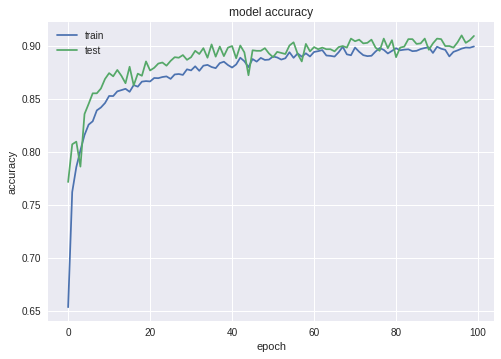

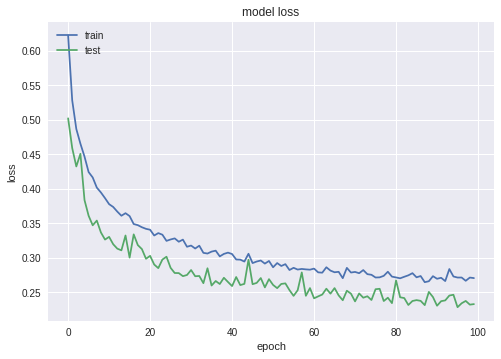

In [45]:
# summarize history for accuracy
plt.plot(fitted_model3.history['acc'])
plt.plot(fitted_model3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(fitted_model3.history['loss'])
plt.plot(fitted_model3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

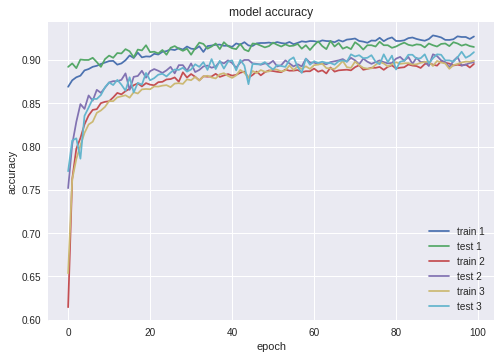

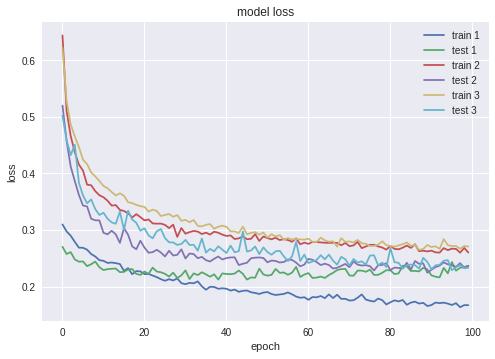

In [48]:


# summarize history for accuracy
plt.plot(fitted_model1.history['acc'])
plt.plot(fitted_model1.history['val_acc'])
plt.plot(fitted_model2.history['acc'])
plt.plot(fitted_model2.history['val_acc'])
plt.plot(fitted_model3.history['acc'])
plt.plot(fitted_model3.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train 1', 'test 1', 'train 2', 'test 2', 'train 3', 'test 3'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(fitted_model1.history['loss'])
plt.plot(fitted_model1.history['val_loss'])
plt.plot(fitted_model2.history['loss'])
plt.plot(fitted_model2.history['val_loss'])
plt.plot(fitted_model3.history['loss'])
plt.plot(fitted_model3.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train 1', 'test 1', 'train 2', 'test 2', 'train 3', 'test 3'], loc='upper right')
plt.show()

### If you have time left over, go start a blog post about one specific Deep Learning-related topic that you would like to understand better. Possible Ideas:

Input Dimensions - RGB vs Grayscale, Channels First, vs Channels Last.

Convolutional Layers - How are they calculated? How to use padding to preserve layer dimensions?

Why does Relu Activation outperform other types of activation for CNNs?

Max Pooling vs Average Pooling? Why is max pooling better? Why pass on the highest value?

How does backpropagation work in CNNs?

Hyperparameter Tuning CNNs

Picking optimal Batch Size

Picking the optimal Number of Filters / kernel size

Brief History of Computer Vision

Summary of Most impactful CNN Architectures i.e. LeNet, AlexNet, ResNet, GoogleNet, etc. 

Matrices for Image Filtering

Edge Detection Methods

Keras vs Tensorflow

### There are so many things that you could write about!!




